<a href="https://colab.research.google.com/github/lourdesvera/Bicycles/blob/main/Chicago_Bike_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chicago Bike Crash Analysis

---



# Step 2: Load and Show Data as a Table

The first step is to load the geographic data into this Jupyter Notebook. A Jupyter Notebook is an open-source application that runs in your web browser. It can contain sections of live code, data visualizations, and text. 

1. Register for a Plotly account at https://plot.ly/feed – click on “sign up.” 
2. Generate an API key at https://plot.ly/settings/api – copy and paste the “API Key” and “Username” fields to the Jupyter Notebook in the appropriate place. 
3. Press the "play" button in the upper-left code window below to run the code. 

In [1]:
!pip install chart_studio
import chart_studio
from chart_studio import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tl
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/lourdesvera/Bicycles/main/City%20Data/Bike_Crashes.csv")

# 2. Register for a Plotly account at https://plot.ly/feed – click on “sign up.” 
# 3. Generate an API key at https://plot.ly/settings/api – copy and paste the “API Key” and “Username” fields to the Jupyter Notebook in the appropriate place. 

chart_studio.tools.set_credentials_file(username='lourdesvera', api_key='QmwLijJo40CSfgG6wjeV')

#4. Check out the column names and data info
for col in data.columns:
    print(col)

CRASH_RECORD_ID
RD_NO
CRASH_DATE_EST_I
CRASH_DATE
POSTED_SPEED_LIMIT
TRAFFIC_CONTROL_DEVICE
DEVICE_CONDITION
WEATHER_CONDITION
LIGHTING_CONDITION
FIRST_CRASH_TYPE
TRAFFICWAY_TYPE
LANE_CNT
ALIGNMENT
ROADWAY_SURFACE_COND
ROAD_DEFECT
REPORT_TYPE
CRASH_TYPE
INTERSECTION_RELATED_I
NOT_RIGHT_OF_WAY_I
HIT_AND_RUN_I
DAMAGE
DATE_POLICE_NOTIFIED
PRIM_CONTRIBUTORY_CAUSE
SEC_CONTRIBUTORY_CAUSE
STREET_NO
STREET_DIRECTION
STREET_NAME
BEAT_OF_OCCURRENCE
PHOTOS_TAKEN_I
STATEMENTS_TAKEN_I
DOORING_I
WORK_ZONE_I
WORK_ZONE_TYPE
WORKERS_PRESENT_I
NUM_UNITS
MOST_SEVERE_INJURY
INJURIES_TOTAL
INJURIES_FATAL
INJURIES_INCAPACITATING
INJURIES_NON_INCAPACITATING
INJURIES_REPORTED_NOT_EVIDENT
INJURIES_NO_INDICATION
INJURIES_UNKNOWN
CRASH_HOUR
CRASH_DAY_OF_WEEK
CRASH_MONTH
LATITUDE
LONGITUDE
LOCATION


In [3]:
#5. The below code selects columns of interest, including latitude and longitude 
# We'll only print the first 6 lines, since this is a big dataset! 
newdata = data.iloc[0:6, [47,46, 17, 18, 20, 21, 31, 36, 37, 38, 39, 40, 41, 42, 44, 45, 48]]

table = ff.create_table(newdata)
py.iplot(table, filename='Chicago Bike Accidents')

# Step 3: Visualize Crashes on Maps 

create a map using the Mapbox API: 

1. Register for a Mapbox account at https://account.mapbox.com/auth/signup/ 
2. Generate an API key at https://account.mapbox.com/ – copy and paste the “default public token" to the space below, along with the Plotly username and API key from above. 

In [4]:
import plotly.graph_objs as go
# Change API key for Plotly 

chart_studio.tools.set_credentials_file(username='lourdesvera', api_key='QmwLijJo40CSfgG6wjeV')

# Add Mapbox access token here 

mapbox_access_token = 'pk.eyJ1IjoibG91cmRlc3ZlcmEiLCJhIjoiY2w4bnAwMDVlMDc4aDN3b2d1aXM2andqbCJ9.O79I6WP1Z6xsGa9E78LtXw'

#Save latitude and longitude as variables. In this dataset, the X column is longitude and the Y column is latitude. 

site_lat = data.LATITUDE
site_lon = data.LONGITUDE
locations_name = data.LOCATION

# Generate the data for the map 

crashes = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=3,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.8
        ),
        hoverinfo='none'
    )]


# Generate a layout around Los Angeles, zoomed in so we can see the data points 

layout = go.Layout(
    title='Chicago Bicycle Crashes, September 2021-2022',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=41.8803,
            lon=-87.6236
        ),
        pitch=0,
        zoom=10,
        style='light'
    ),
)
	
# Generate the figure using the iplot function 
  
fig = dict(data=crashes, layout=layout)
py.iplot(fig, filename='Chicago Bicycle Crashes, September 2021-2022')

In [5]:
!pip install geopandas
!pip install contextily
import geopandas
import contextily as cx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
for col in data.columns:
    print(col)

CRASH_RECORD_ID
RD_NO
CRASH_DATE_EST_I
CRASH_DATE
POSTED_SPEED_LIMIT
TRAFFIC_CONTROL_DEVICE
DEVICE_CONDITION
WEATHER_CONDITION
LIGHTING_CONDITION
FIRST_CRASH_TYPE
TRAFFICWAY_TYPE
LANE_CNT
ALIGNMENT
ROADWAY_SURFACE_COND
ROAD_DEFECT
REPORT_TYPE
CRASH_TYPE
INTERSECTION_RELATED_I
NOT_RIGHT_OF_WAY_I
HIT_AND_RUN_I
DAMAGE
DATE_POLICE_NOTIFIED
PRIM_CONTRIBUTORY_CAUSE
SEC_CONTRIBUTORY_CAUSE
STREET_NO
STREET_DIRECTION
STREET_NAME
BEAT_OF_OCCURRENCE
PHOTOS_TAKEN_I
STATEMENTS_TAKEN_I
DOORING_I
WORK_ZONE_I
WORK_ZONE_TYPE
WORKERS_PRESENT_I
NUM_UNITS
MOST_SEVERE_INJURY
INJURIES_TOTAL
INJURIES_FATAL
INJURIES_INCAPACITATING
INJURIES_NON_INCAPACITATING
INJURIES_REPORTED_NOT_EVIDENT
INJURIES_NO_INDICATION
INJURIES_UNKNOWN
CRASH_HOUR
CRASH_DAY_OF_WEEK
CRASH_MONTH
LATITUDE
LONGITUDE
LOCATION


In [7]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(data, lat='LATITUDE', lon='LONGITUDE')
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_access_token)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#Bike Lane Map

Reading shapefiles code from: https://medium.com/@loldja/reading-shapefile-zips-from-a-url-in-python-3-93ea8d727856 

In [8]:
import geopandas as gpd
import requests
import zipfile
import io
import matplotlib.pyplot as plt
%matplotlib inline 
# jupyter "magic" to display plots in notebook

In [9]:
url = 'https://data.cityofchicago.org/api/geospatial/3w5d-sru8?method=export&format=Shapefile'
local_path = 'tmp/'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")
z.extractall(path=local_path) # extract to folder
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

Done
['geo_export_3d08f28b-b971-46a0-b2db-2728ee9bdf38.dbf', 'geo_export_3d08f28b-b971-46a0-b2db-2728ee9bdf38.prj', 'geo_export_3d08f28b-b971-46a0-b2db-2728ee9bdf38.shp', 'geo_export_3d08f28b-b971-46a0-b2db-2728ee9bdf38.shx']


In [10]:
dbf, prj, shp, shx = [filename for filename in filenames]
lanes = gpd.read_file(local_path + shp)
print("Shape of the dataframe: {}".format(lanes.shape))
print("Projection of dataframe: {}".format(lanes.crs))
lanes.tail() #last 5 records in dataframe

Shape of the dataframe: (883, 8)
Projection of dataframe: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,displayrou,f_street,mi_ctrline,objectid,pre_dir,street,t_street,geometry
878,NEIGHBORHOOD GREENWAY,W DOUGLAS BLVD,0.109576,0.0,S,HAMLIN AVE,W DOUGLAS BLVD,"LINESTRING (-87.71942 41.86303, -87.71985 41.8..."
879,NEIGHBORHOOD GREENWAY,S HAMLIN AVE,0.065775,0.0,W,DOUGLAS BLVD,S RIDGEWAY AVE,"LINESTRING (-87.72023 41.86212, -87.71895 41.8..."
880,PROTECTED BIKE LANE,S AUSTIN BLVD,0.527453,0.0,W,JACKSON BLVD,S CENTRAL AVE,"LINESTRING (-87.77452 41.87641, -87.77441 41.8..."
881,SHARED-LANE,S CENTRAL AVE,0.504272,0.0,W,JACKSON BLVD,S LARAMIE AVE,"LINESTRING (-87.76472 41.87654, -87.76168 41.8..."
882,BIKE LANE,W GRAND AVE,0.878858,0.0,W,ARMITAGE AVE,N KOSTNER AVE,"LINESTRING (-87.75338 41.91684, -87.74982 41.9..."


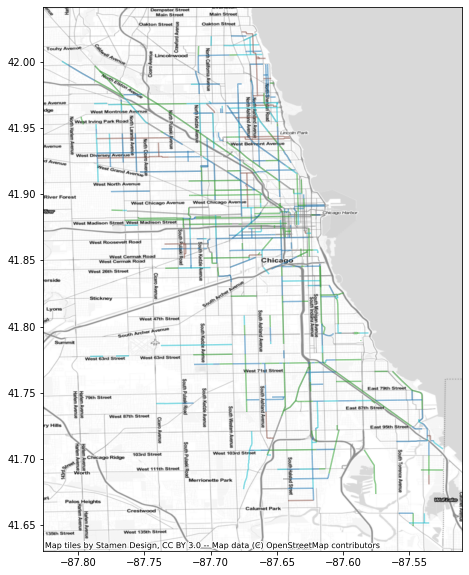

In [11]:
ax = lanes.plot(column='displayrou', figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, crs=lanes.crs, source=cx.providers.Stamen.TonerLite)

In [12]:
!pip install folium matplotlib mapclassify
lanes.explore(column='displayrou', cmap='RdYlBu', style_kwds={'weight':8, 'opacity':0.8})

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Lanes and Crashes

In [13]:
import shapely.geometry

In [14]:
#format points
pnt = data
geom = gpd.points_from_xy(data["LONGITUDE"], data["LATITUDE"], crs=4326)
pnt = gpd.GeoDataFrame(data=data, geometry=geom)
pnt = pnt.drop(["LONGITUDE", "LATITUDE"], axis=1)

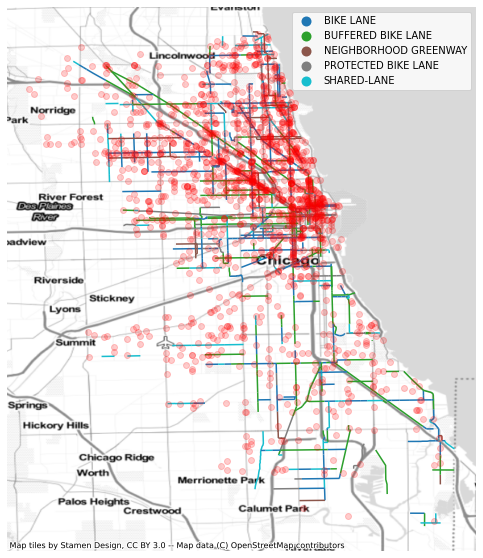

In [15]:
# Plot
bike_lanes = lanes.plot(column='displayrou', figsize=(10, 10), zorder=1, legend=True)
ax = pnt.plot(ax=bike_lanes, alpha=0.2, color="red", zorder=2, legend=True);

ax.set_axis_off()

cx.add_basemap(ax, crs=pnt.crs, source=cx.providers.Stamen.TonerLite)

Another map...

In [16]:
# Import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import geopandas as gpd
!pip install earthpy
import earthpy as et

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
print(lanes['displayrou'].unique())
print(pnt['INJURIES_TOTAL'].unique())

['BIKE LANE' 'SHARED-LANE' 'BUFFERED BIKE LANE' 'PROTECTED BIKE LANE'
 'NEIGHBORHOOD GREENWAY']
[0 1 2]


In [18]:
# Reproject the data
lanes_utm = lanes.to_crs(pnt.crs)

In [19]:
#colors for lanes
lanesPalette = {'BIKE LANE': "#c1c9f7", 'SHARED-LANE': "#91aafe", 'BUFFERED BIKE LANE':"#4664e3", 'PROTECTED BIKE LANE':"#2b609e",
 'NEIGHBORHOOD GREENWAY':"#0d4260",}

#turn points into categorical data for injury total
pnt.INJURIES_TOTAL = pnt.INJURIES_TOTAL.astype('string')
#colors for points
pointsPalette = {'0': "#F6BDC0", '1': "#F07470", '2':"#DC1C13"}

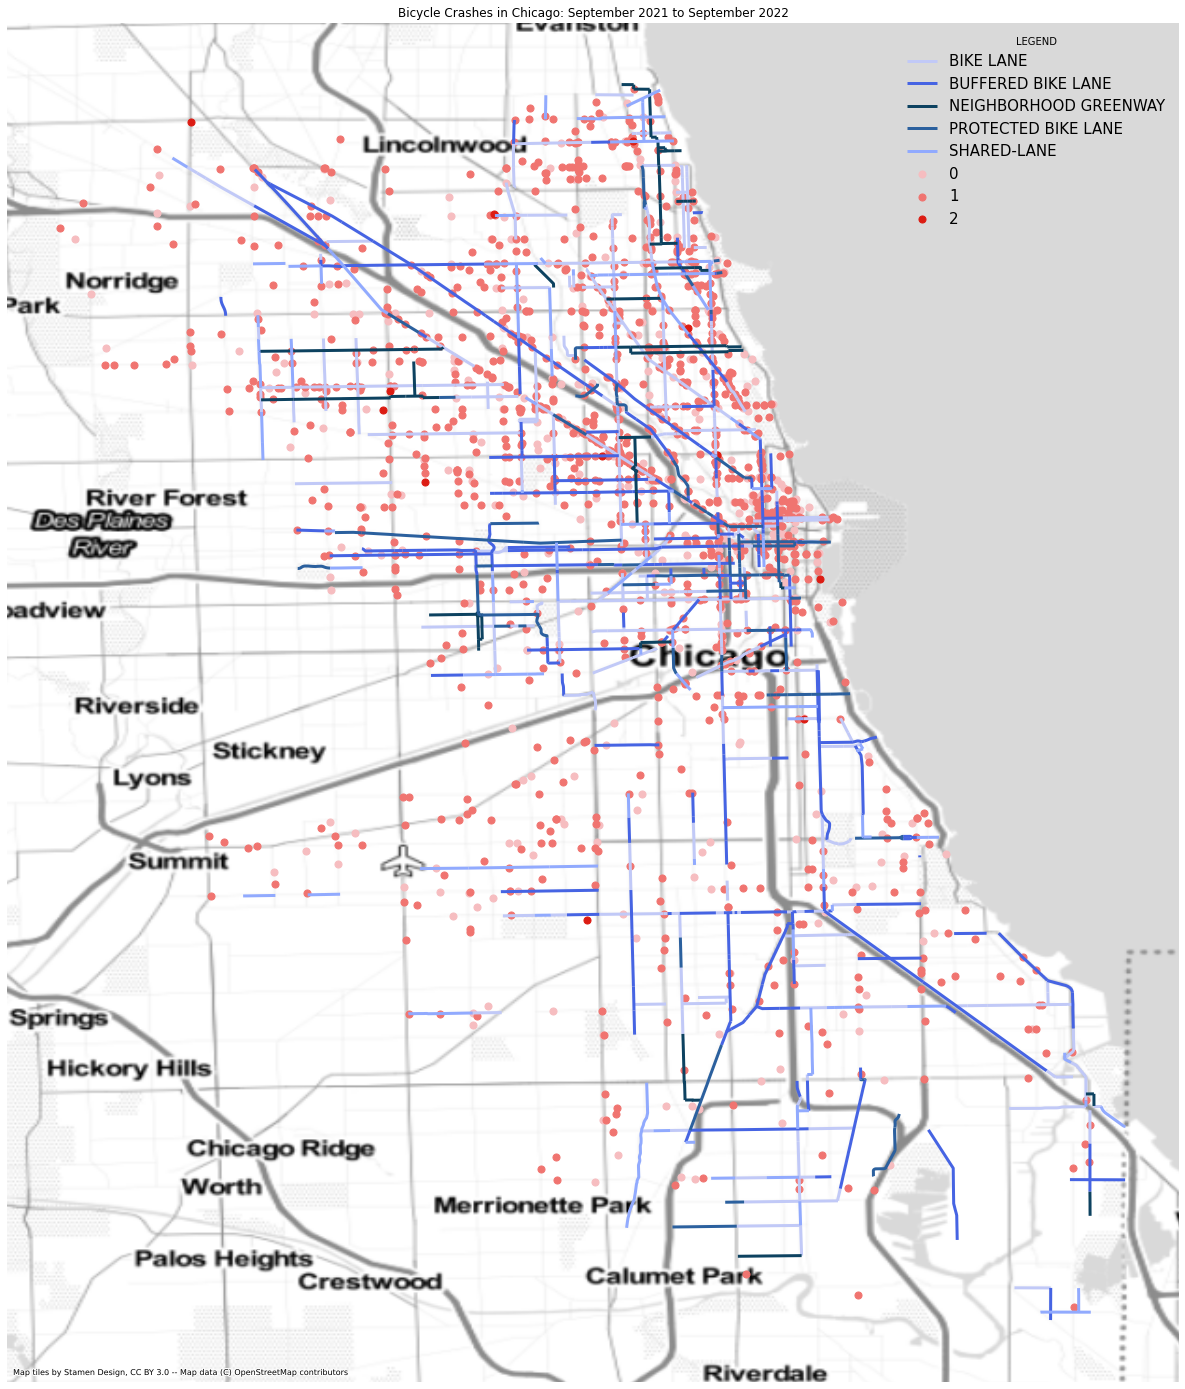

In [20]:
fig, ax = plt.subplots(figsize=(25, 25))

for ctype, data in lanes_utm.groupby('displayrou'):
    color = lanesPalette[ctype]
    label = ctype
    data.plot(color=color,
              ax=ax,
              label=label,
              linewidth=3)
    
for ctype, data in pnt.groupby('INJURIES_TOTAL'):
    color = pointsPalette[ctype]
    label = ctype    
    data.plot(color=color,
              ax=ax,
              label=label,
              markersize=50)
    
ax.set(title='Bicycle Crashes in Chicago: September 2021 to September 2022')

ax.legend(fontsize=15,
          frameon=False,
          loc=('upper right'),
          title="LEGEND")

cx.add_basemap(ax, crs=pnt.crs, source=cx.providers.Stamen.TonerLite)

ax.set_axis_off()
plt.show()

^ should order bike lanes by how protective they are

Statistical Analysis
* How many crashes?
* fatal injuries?
* Incapacitating?
* Total bike crashes?
* Is there a connection between bike lane type and number of crashes?
  * How many crashes by bike lane type?
  * Is this statistically significant?

  ...other questions?

In [21]:
crashes = pnt
routes = lanes

In [22]:
crashes.describe
#there were 1641 crashes in the past year

<bound method NDFrame.describe of                                         CRASH_RECORD_ID     RD_NO  \
0     4c44750fcce092d3cbc97adb5cfc6081d4212249add04a...  JF319089   
1     72c272439fc6c2e94695ab0368946b8dadba9cf2c4f7c4...  JF318951   
2     a59ddd18e2e96078ba31c13a17050944c6d198ab675d4f...  JF318044   
3     d9d1485925fdc45ec5860359f52010cef8d100502570e9...  JF318891   
4     7a29b0d3f9cfbcf115fa5a2a1739dfc35c9e7d9e9aa306...  JE400982   
...                                                 ...       ...   
1636  c8b9aecc9a1618bc60ecb791b910207e736f2a89f18dc5...  JF377999   
1637  d0f9fa36362a184cff88fa654333c9ffdfd060feb38043...  JF377884   
1638  ec4be641fe327844d31fd672d3bd3cd913a99cfe8c69a9...  JF377977   
1639  e56e02b0892e56ace528f5b9cba8574f22d3ec3d5c48a9...  JF365534   
1640  618394637d62104c84101b78519d11655f3baf9b5d1d34...  JF412674   

     CRASH_DATE_EST_I              CRASH_DATE  POSTED_SPEED_LIMIT  \
0                 NaN  07/15/2022 09:17:00 PM                  30   

In [23]:
#columns with numbers
resultn = crashes.select_dtypes(include='number')
crashes_numbers = resultn

In [24]:
#injuries total categorical to numeric
crashes_numeric = crashes[['LANE_CNT', 'STREET_NO', 'POSTED_SPEED_LIMIT', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'CRASH_HOUR']]
#change total injuries to numeric
cols = crashes_numeric.columns
crashes_numeric[cols] = crashes_numeric[cols].apply(pd.to_numeric, errors='coerce')
#numeric stats
crashes_numeric.describe()

,LANE_CNT,STREET_NO,POSTED_SPEED_LIMIT,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR
count,0.0,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000
mean,NaN,2932.283364,29.054845,0.003656,0.099939,0.531993,0.117002,14.389397
std,NaN,2304.597778,3.903959,0.060375,0.304048,0.505199,0.325291,4.847942
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1138.000000,30.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,NaN,2427.000000,30.000000,0.000000,0.000000,1.000000,0.000000,15.000000
75%,NaN,4228.000000,30.000000,0.000000,0.000000,1.000000,0.000000,18.000000
max,NaN,13302.000000,45.000000,1.000000,2.000000,2.000000,2.000000,23.000000


In [25]:
crashes_numeric.columns

Index(['LANE_CNT', 'STREET_NO', 'POSTED_SPEED_LIMIT', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'CRASH_HOUR'],
      dtype='object')

In [26]:
#columns with categories
resultc = crashes.select_dtypes(include='category')
crashes_cats = resultc

In [27]:
crashes.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LO

In [28]:
#data frame for categorical
crashes_cat = crashes[['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND','ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I','HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME', 'DOORING_I', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION','INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]
#change total injuries to categorical
for col in ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND','ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I','HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME', 'DOORING_I', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION','INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']:
    crashes_cat[col] = crashes_cat[col].astype('category')
#categorical stats
crashes_cat.describe()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
count,1641,1641,1641,1641,1641,1641,1641,0,1641,1641,...,1641,1641,1641,1641,1641,1641,1641,1641,1641,1641
unique,10,12,8,10,6,1,19,0,5,6,...,3,2,3,3,3,8,1,24,7,12
top,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,...,1,0,0,1,0,1,0,17,3,6
freq,1308,757,775,1403,1176,1641,750,NaN,1609,1341,...,1211,1635,1479,863,1451,1011,1641,182,267,234


In [29]:
# Creating Empty DataFrame and Storing it in variable df
cat_types = pd.DataFrame()

#name rows according to parameter name
cat_types.index = [crashes_cat.columns]
  
# Printing Empty DataFrame
print(cat_types)

Empty DataFrame
Columns: []
Index: [(POSTED_SPEED_LIMIT,), (TRAFFIC_CONTROL_DEVICE,), (DEVICE_CONDITION,), (WEATHER_CONDITION,), (LIGHTING_CONDITION,), (FIRST_CRASH_TYPE,), (TRAFFICWAY_TYPE,), (LANE_CNT,), (ALIGNMENT,), (ROADWAY_SURFACE_COND,), (ROAD_DEFECT,), (REPORT_TYPE,), (CRASH_TYPE,), (INTERSECTION_RELATED_I,), (HIT_AND_RUN_I,), (DAMAGE,), (PRIM_CONTRIBUTORY_CAUSE,), (SEC_CONTRIBUTORY_CAUSE,), (STREET_DIRECTION,), (STREET_NAME,), (DOORING_I,), (MOST_SEVERE_INJURY,), (INJURIES_TOTAL,), (INJURIES_FATAL,), (INJURIES_INCAPACITATING,), (INJURIES_NON_INCAPACITATING,), (INJURIES_REPORTED_NOT_EVIDENT,), (INJURIES_NO_INDICATION,), (INJURIES_UNKNOWN,), (CRASH_HOUR,), (CRASH_DAY_OF_WEEK,), (CRASH_MONTH,)]


In [30]:
for col in ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND','ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I','HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME', 'DOORING_I', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION','INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']:
   cat_types.at[[col], 'Unique Values List']  =', '.join(map(str,list(crashes_cat[col].value_counts().index)))



In [31]:
cat_types

,Unique Values List
POSTED_SPEED_LIMIT,"30, 25, 35, 20, 15, 10, 0, 40, 24, 45"
TRAFFIC_CONTROL_DEVICE,"NO CONTROLS, TRAFFIC SIGNAL, STOP SIGN/FLASHER..."
DEVICE_CONDITION,"NO CONTROLS, FUNCTIONING PROPERLY, UNKNOWN, OT..."
WEATHER_CONDITION,"CLEAR, RAIN, UNKNOWN, CLOUDY/OVERCAST, SNOW, O..."
LIGHTING_CONDITION,"DAYLIGHT, DARKNESS, LIGHTED ROAD, DUSK, UNKNOW..."
FIRST_CRASH_TYPE,PEDALCYCLIST
TRAFFICWAY_TYPE,"NOT DIVIDED, FOUR WAY, DIVIDED - W/MEDIAN (NOT..."
LANE_CNT,
ALIGNMENT,"STRAIGHT AND LEVEL, STRAIGHT ON GRADE, CURVE, ..."
ROADWAY_SURFACE_COND,"DRY, WET, UNKNOWN, SNOW OR SLUSH, ICE, OTHER"


In [32]:
from functools import reduce

In [33]:
for col in ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND','ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I','HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME', 'DOORING_I', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION','INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']:
  w = crashes_cat
  s = w[col]
  counts = s.value_counts()
  percent = s.value_counts(normalize=True)
  percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
  df = pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
  globals()[f'df_{col}'] = df

In [34]:
#@title Choose a DataFrame to View Unique Values and Their Frequencies { run: "auto", vertical-output: true, display-mode: "both" }
List_of_Parameters = df_TRAFFICWAY_TYPE #@param ["df_POSTED_SPEED_LIMIT", "df_TRAFFIC_CONTROL_DEVICE", "df_DEVICE_CONDITION", "df_WEATHER_CONDITION", "df_LIGHTING_CONDITION", "df_FIRST_CRASH_TYPE", "df_TRAFFICWAY_TYPE", "df_LANE_CNT", "df_ALIGNMENT", "df_ROADWAY_SURFACE_COND", "df_ROAD_DEFECT", "df_REPORT_TYPE", "df_CRASH_TYPE", "df_INTERSECTION_RELATED_I", "df_HIT_AND_RUN_I", "df_DAMAGE", "df_PRIM_CONTRIBUTORY_CAUSE", "df_SEC_CONTRIBUTORY_CAUSE", "df_STREET_DIRECTION", "df_STREET_NAME", "df_DOORING_I", "df_MOST_SEVERE_INJURY", "df_INJURIES_TOTAL", "df_INJURIES_FATAL", "df_INJURIES_INCAPACITATING", "df_INJURIES_NON_INCAPACITATING", "df_INJURIES_REPORTED_NOT_EVIDENT", "df_INJURIES_NO_INDICATION", "df_INJURIES_UNKNOWN", "df_CRASH_HOUR", "df_CRASH_DAY_OF_WEEK", "df_CRASH_MONTH"] {type:"raw"}
List_of_Parameters

,counts,per,per100
NOT DIVIDED,750,0.457038,45.7%
FOUR WAY,247,0.150518,15.1%
DIVIDED - W/MEDIAN (NOT RAISED),242,0.147471,14.7%
ONE-WAY,138,0.084095,8.4%
T-INTERSECTION,65,0.039610,4.0%
ALLEY,39,0.023766,2.4%
DIVIDED - W/MEDIAN BARRIER,35,0.021328,2.1%
OTHER,31,0.018891,1.9%
PARKING LOT,19,0.011578,1.2%
UNKNOWN,15,0.009141,0.9%


#Which bike lanes did the crashes happen in?

CODE BELOW IS IN PROGRESS
* Need to found out which points are located in which lanes

In [35]:
lanes.describe
#there are 883 bike lanes

<bound method NDFrame.describe of                 displayrou            f_street  mi_ctrline  objectid pre_dir  \
0                BIKE LANE  S CENTRAL PARK AVE    0.495170       1.0       W   
1              SHARED-LANE        S KEDZIE AVE    0.252403       2.0       W   
2                BIKE LANE         S DAMEN AVE    0.757321       3.0       W   
3       BUFFERED BIKE LANE           E 81ST ST    0.754309       4.0       S   
4      PROTECTED BIKE LANE        N KEDZIE AVE    1.522768       5.0       W   
..                     ...                 ...         ...       ...     ...   
878  NEIGHBORHOOD GREENWAY      W DOUGLAS BLVD    0.109576       0.0       S   
879  NEIGHBORHOOD GREENWAY        S HAMLIN AVE    0.065775       0.0       W   
880    PROTECTED BIKE LANE       S AUSTIN BLVD    0.527453       0.0       W   
881            SHARED-LANE       S CENTRAL AVE    0.504272       0.0       W   
882              BIKE LANE         W GRAND AVE    0.878858       0.0       W   

     

In [36]:
crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   CRASH_RECORD_ID                1641 non-null   object  
 1   RD_NO                          1641 non-null   object  
 2   CRASH_DATE_EST_I               78 non-null     object  
 3   CRASH_DATE                     1641 non-null   object  
 4   POSTED_SPEED_LIMIT             1641 non-null   int64   
 5   TRAFFIC_CONTROL_DEVICE         1641 non-null   object  
 6   DEVICE_CONDITION               1641 non-null   object  
 7   WEATHER_CONDITION              1641 non-null   object  
 8   LIGHTING_CONDITION             1641 non-null   object  
 9   FIRST_CRASH_TYPE               1641 non-null   object  
 10  TRAFFICWAY_TYPE                1641 non-null   object  
 11  LANE_CNT                       0 non-null      float64 
 12  ALIGNMENT                 

In [37]:
crashes['LOCATION']

0       POINT (-87.616598442402 41.809274149635)
1       POINT (-87.721766452123 41.902819868301)
2        POINT (-87.632663188069 41.89784606938)
3        POINT (-87.72173622434 41.742068093164)
4       POINT (-87.617515679751 41.875756255241)
                          ...                   
1636    POINT (-87.666594200293 41.875068066522)
1637    POINT (-87.637247807935 41.896659619828)
1638    POINT (-87.710804819562 41.869936869387)
1639    POINT (-87.639660529114 41.941105293323)
1640    POINT (-87.674398679737 41.908270041659)
Name: LOCATION, Length: 1641, dtype: object

Code below is not working

In [38]:
#from shapely.geometry import Point, LineString
#point = geopandas.GeoDataFrame(crashes, geometry=crashes['LOCATION'])
#line = geopandas.GeoDataFrame(
    #lanes, geometry=lanes['geometry'])

In [39]:
#lines_gdf = line.set_crs("WGS84", allow_override=True)
#points_gdf = point.set_crs("WGS84", allow_override=True)

In [40]:
#x = lines_gdf.within(points_gdf)  # False
#y = lines_gdf.distance(points_gdf) 
#z = lines_gdf.distance(points_gdf) < 1e-8  # True

In [41]:
#df = pd.DataFrame(x)
#df = df.rename(columns = {0:'true_or_false'})
#df

In [42]:
#df['true_or_false']

In [43]:
#x.describe()

In [44]:
#z.describe()